In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

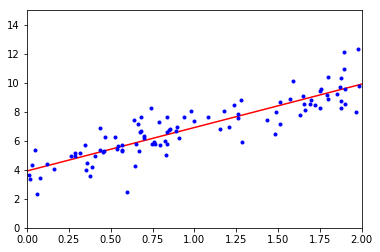

In [2]:
#linear model
#y=theta*x

x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_b=np.c_[np.ones((100,1)),x]#x0=1
theta=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta)
y_predict
plt.plot(x_new,y_predict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

[1.66066066]


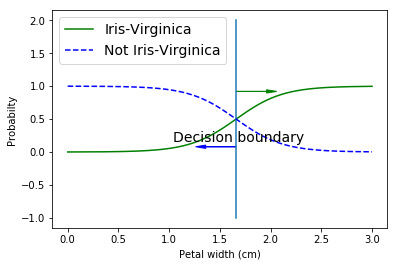

In [3]:
#logistic regression
from sklearn import datasets
iris=datasets.load_iris()
x=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int)
log_reg=LogisticRegression()
log_reg.fit(x,y)
x_new=np.linspace(0,3,1000).reshape(-1,1)#灑點to一維
y_proba=log_reg.predict_proba(x_new)
#取出在petal_width的範圍中 sigmoid functio>0.5的值
decision_boundary=x_new[y_proba[:,1]>=0.5][0]#1st
print(decision_boundary)
#以實線表示
plt.plot(x_new,y_proba[:,1],'g-',label='Iris-Virginica')
#畫出中間的boundary線 描繪出兩邊的選擇
plt.plot([decision_boundary,decision_boundary],[-1,2])#x,y
plt.plot(x_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.text(decision_boundary+0.02,0.15,'Decision boundary',fontsize=14,color='k',ha='center')
#告訴兩邊屬於哪一種
plt.arrow(decision_boundary,0.08,-0.3,0,head_width=0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width=0.05,head_length=0.1,fc='g',ec='g')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probabilty')
plt.legend(loc='best',fontsize=14)

In [5]:
#linear svm
iris=datasets.load_iris()
x=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)
svm_clf=Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1,loss="hinge"))])
svm_clf.fit(x,y)
svm_clf.predict([[5.5,1.7]])

array([1.])